# Start
**import libraries**

In [28]:
import torch

import numpy as np

import matplotlib.pyplot as plt

**During initialization, it is common to create the layers of a neural network.**


The forward method is used for forward propagation in a neural network.

In [29]:
import torch.nn as nn

In [30]:
class ourFirstNetwork(nn.Module):
  def __init__(self):
    super(ourFirstNetwork, self).__init__()
    self.fc1 = nn.Linear(100,10)
    self.fc1_act = nn.ReLU()

  def forward(self, x):
    y = self.fc1_act(self.fc1(x))
    return y

In [31]:
a = torch.rand(100)
model =  ourFirstNetwork()
model(a)

tensor([0.1333, 0.1882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2696,
        0.0000], grad_fn=<ReluBackward0>)

# Torchvision

**load MNIST**
*   torchvision is a Package for easy access to datasets And architectures And common image transformations
*   Next up is working with MNIST.




(<PIL.Image.Image image mode=L size=28x28 at 0x7C75EF8CA410>, 5)


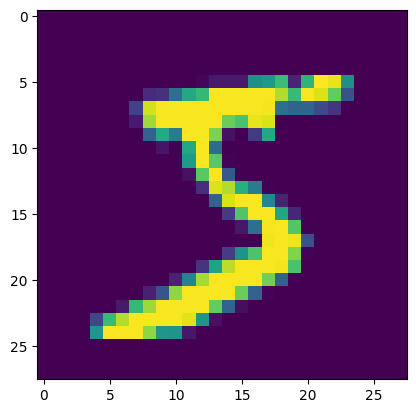

In [32]:
import torchvision

train_MNIST = torchvision.datasets.MNIST('data_mnist/train', train=True, transform=None, download=True)
test_MNIST = torchvision.datasets.MNIST('data_mnist/test', train=False, transform=None, download=True)

print(train_MNIST[0])

pexels = np.asarray(train_MNIST[0][0])
plt.imshow(pexels)

**We have data, but how can we use them for training?**

In PyTorch, there is a class  *DataLoader*  specifically designed for iterating over a dataset during model training

In [33]:
import torchvision.transforms as transforms
import torchvision.utils

(<PIL.Image.Image image mode=L size=28x28 at 0x7C75ED5AE410>, 5)


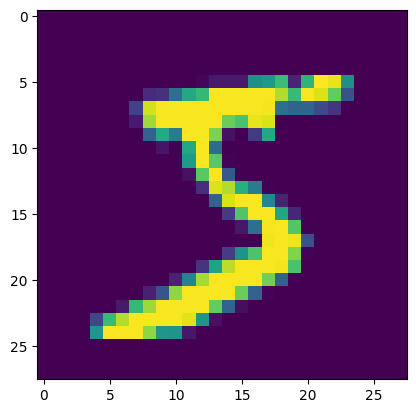

In [34]:
train_MNIST_ten = torchvision.datasets.MNIST('data_mnist/train', train=True,
                                             transform=transforms.Compose([transforms.ToTensor()]),
                                             download=True)
test_MNIST_ten = torchvision.datasets.MNIST('data_mnist/test', train=False,
                                            transform=transforms.Compose([transforms.ToTensor()]),
                                            download=True)

print(train_MNIST[0], end='\n')

pexels = np.asarray(train_MNIST[0][0])
plt.imshow(pexels)

The next step is to create an iterator for traversing through the dataset.

In [53]:
batch_size = 100

train_loader = torch.utils.data.DataLoader(
    dataset=train_MNIST_ten,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_MNIST_ten,
    batch_size=batch_size,
    shuffle=False
)

In [36]:
img, label = test_MNIST[0]
label

7

In [37]:
imeges, classes = next(iter(train_loader))
classes

tensor([8, 1, 0, 5, 2, 1, 1, 8, 1, 6, 1, 3, 3, 2, 9, 5, 6, 7, 2, 4, 8, 3, 5, 3,
        2, 7, 3, 5, 2, 6, 9, 4, 4, 2, 2, 9, 2, 9, 0, 3, 0, 5, 4, 7, 6, 6, 1, 3,
        0, 5, 7, 2, 9, 8, 5, 6, 5, 8, 8, 2, 6, 1, 3, 7, 2, 4, 8, 2, 0, 1, 3, 1,
        6, 5, 4, 1, 1, 9, 0, 8, 3, 1, 7, 8, 7, 6, 3, 5, 1, 6, 0, 3, 0, 1, 9, 2,
        9, 8, 2, 3])

In [54]:
len(train_loader)

600

# Dropout

In [38]:
model.train()
model.eval()

ourFirstNetwork(
  (fc1): Linear(in_features=100, out_features=10, bias=True)
  (fc1_act): ReLU()
)

In [39]:
class ourSecondNetwork(nn.Module):
  def __init__(self, zero_prop):
    super(ourSecondNetwork, self).__init__()
    self.fc1 = nn.Linear(28*28,100)
    self.fc2 = nn.Linear(100,10)
    self.fc1_act = nn.ReLU()
    self.dropout = nn.Dropout(p=zero_prop)

  def forward(self, x):
    y = self.fc1(x)
    y = self.fc1_act(y)
    y = self.fc2(y)
    return y

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [41]:
model = ourSecondNetwork(0.2)

In [42]:
import time
import os

model.train()
model.to(device)

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

def accuracy(output, labels):
  predictions = torch.argmax(output, dim=1)
  correct = (predictions == labels).sum().cpu().numpy()
  return correct/len(labels)

start_time = time.time()

maxacc = 0
for epoch in range(5):

  model.train()
  for itr, data in enumerate(train_loader):

    imgs = data[0].to(device)
    labels = data[1].to(device)

    imgs = imgs.view(-1, 28*28)

    y_pred = model(imgs)
    loss = loss_func(y_pred, labels)
    if itr % 100 == 0:
      print("iteration {}, train acc {:.2f}, loss {:.04f}".format(itr+epoch*len(train_loader),
                                                                  accuracy(y_pred, labels),
                                                                  loss))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  model.eval()

  accuracies = []
  for itr, data in enumerate(test_loader):
    imgs = data[0].to(device)
    labels = data[1].to(device)
    imgs = imgs.view(-1, 28*28)
    y_pred = model(imgs)
    accuracies.append(accuracy(y_pred, labels))
  print(f'test acc: {np.mean(np.array(accuracies)):.5f}')

  if np.mean(np.array(accuracies)) > maxacc:
    print('saving model because its better')
    maxacc = np.mean(np.array(accuracies))
    torch.save(model, f'mymodel.pth')

print("Total time {:.4f} seconds".format(time.time() - start_time))

iteration 0, train acc 0.08, loss 2.3186
iteration 100, train acc 0.64, loss 1.8136
iteration 200, train acc 0.76, loss 1.3727
iteration 300, train acc 0.83, loss 0.9179
iteration 400, train acc 0.80, loss 0.7942
iteration 500, train acc 0.92, loss 0.6314
test acc: 0.87980
saving model because its better
iteration 600, train acc 0.89, loss 0.5158
iteration 700, train acc 0.88, loss 0.5680
iteration 800, train acc 0.87, loss 0.4951
iteration 900, train acc 0.91, loss 0.4049
iteration 1000, train acc 0.89, loss 0.4156
iteration 1100, train acc 0.92, loss 0.3036
test acc: 0.90480
saving model because its better
iteration 1200, train acc 0.83, loss 0.5081
iteration 1300, train acc 0.89, loss 0.4078
iteration 1400, train acc 0.92, loss 0.2676
iteration 1500, train acc 0.89, loss 0.3249
iteration 1600, train acc 0.87, loss 0.3885
iteration 1700, train acc 0.86, loss 0.3658
test acc: 0.91270
saving model because its better
iteration 1800, train acc 0.91, loss 0.3251
iteration 1900, train acc 

# loading the weights of a saved model

In [50]:
wghts = torch.load('mymodel.pth', weights_only=False)
model.load_state_dict(wghts.state_dict())

<All keys matched successfully>

# check on a test sample 2

In [56]:
model.eval()

with torch.no_grad():
  acc = []
  for itr, data in enumerate(test_loader):
    imgs = data[0].to(device)
    labels = data[1].to(device)
    imgs = imgs.view(-1, 28*28)

    y_pred = model.forward(imgs)
    acc.append(accuracy(y_pred, labels))
print(f'test acc: {(sum(acc)/len(acc)):.2f}')

test acc: 0.92
